In [1]:
#importing the librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline

In [3]:
#reading the csv file and subsetting the Netherlands country data only
df = pd.read_csv('data.csv', sep='\t')
df = df[df['country']=='NL']

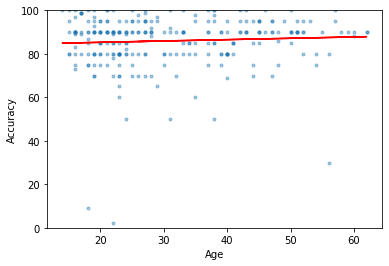

In [5]:
#plotting the data of accuracy and age and then a linear regression line
x = df.age
y = df.accuracy
_ =plt.plot(x, y, marker='.', linestyle='none', alpha=0.4)
_ =plt.ylim(0,100)

a,b = np.polyfit(x,y,1)

_ = plt.plot(x, a*x + b, color='red')
plt.xlabel('Age')
plt.ylabel('Accuracy')
plt.show()


### no correlation seem to exist between the age and accuracy. the regression line is almost straight, there might be a non linear relationship but that cannot be confirmed with this approach.

In [6]:
#subsetting the dataset to only the last 5 question and the last few informative cols.
#importing the chi2 from scipy
#lopping over the questions and then running the chi2 test while displaying the values of the chi2 and p-value
df = df.iloc[:,-11:]

from scipy.stats import chi2_contingency
cols = ['P6', 'P7', 'P8', 'P9', 'P10']
for col in cols:
    
    chi2, p, dof, expected = chi2_contingency(pd.crosstab(df.gender,df[col]))
    print("chi2 statistic {}, p-value {}".format(chi2,p))


chi2 statistic 10.524383933147655, p-value 0.39575149109892366
chi2 statistic 7.831979822112829, p-value 0.6452448421266488
chi2 statistic 14.00953635576384, p-value 0.17255706944919597
chi2 statistic 6.557789215104859, p-value 0.7664281771729189
chi2 statistic 9.233290085537343, p-value 0.5101160070467887


### I chose to use the chi2 because it is dealing with categorical data. although the answers are numerical but they represent some sort of category. for instance 1 could be : very low and 5 would be: very high
### in conclusion, the p values are all above 0.05. in chi2 we need them to be less than 0.05 to say that they are dependent. I am going to fail to reject the hypothesis by saying that the gender and the answers to the questions do not seem to be dependent but we need more evidence to confirm they are dependent.